In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.ensemble import RandomForestClassifier # For RFC
from sklearn.svm import SVC                               #For SVM
from sklearn.metrics import matthews_corrcoef    
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,roc_curve,auc
sns.set(style="ticks", color_codes=True)

In [13]:
df = pd.read_csv("combined_dataset.csv")

In [14]:
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [15]:
df.isnull().sum()
df.isna().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [16]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
domain            95910 non-null object
ranking           95910 non-null int64
isIp              95910 non-null int64
valid             95910 non-null int64
activeDuration    95910 non-null int64
urlLen            95910 non-null int64
is@               95910 non-null int64
isredirect        95910 non-null int64
haveDash          95910 non-null int64
domainLen         95910 non-null int64
nosOfSubdomain    95910 non-null int64
label             95910 non-null int64
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


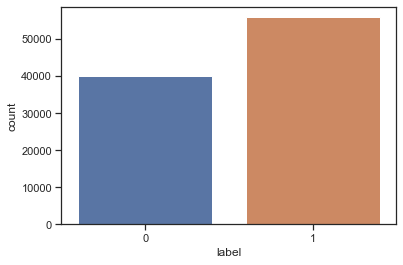

In [20]:
sns.countplot(df['label'])

In [21]:
df.corr()
df.corr()['label'].sort_values()

activeDuration   -0.523114
valid            -0.266774
isIp              0.012811
is@               0.039777
isredirect        0.073247
nosOfSubdomain    0.113249
domainLen         0.231828
haveDash          0.239623
urlLen            0.396519
ranking           0.516873
label             1.000000
Name: label, dtype: float64

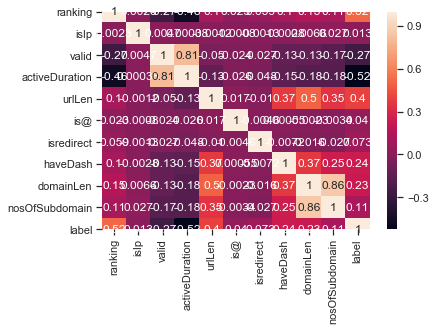

In [22]:
#plt.figure(figsize = ('8','8'))
sns.heatmap(df.corr(),annot=True)

In [23]:
inputs = df.drop(['label', 'domain'], axis=1)
outputs = df.label

In [24]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 71932 samples.
Testing set has 23978 samples.


In [19]:
#create logistic regression object
LogReg=LogisticRegression()

#Train the model using training data 
LogReg.fit(x_train,y_train)

#Test the model using testing data
y_pred = LogReg.predict(x_test)

NameError: name 'x_train' is not defined

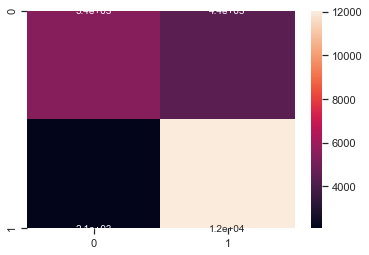

In [15]:
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True)

In [16]:
print("f1 score is ",f1_score(y_test,y_pred,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred))
print("The accuracy Logistic Regression on testing data is: ",100.0 *accuracy_score(y_test,y_pred))

f1 score is  0.7200372031917678
matthews correlation coefficient is  0.42719430567829
The accuracy Logistic Regression on testing data is:  72.80423721744933


In [15]:
# - With Parameter adjustment

In [25]:
from sklearn import metrics

#Grid Search
from sklearn.model_selection import GridSearchCV

LogReg1= LogisticRegression(random_state= 0)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(LogReg1, param_grid = grid_values,scoring = 'f1',cv = 4)
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_log = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_log)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_log)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_log)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_log)))
print('Classification Report')
print(metrics.classification_report(y_test,y_pred_log) )
#Logistic Regression (Grid Search) Confusion matrix
cm = confusion_matrix(y_test,y_pred_log)
print('Confusion Matrix :')
print(cm)


Accuracy Score : 0.8781382934356493
Precision Score : 0.8928059615935798
Recall Score : 0.8973066397810745
F1 Score : 0.8950506429135839
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     10092
           1       0.89      0.90      0.90     13886

    accuracy                           0.88     23978
   macro avg       0.88      0.87      0.87     23978
weighted avg       0.88      0.88      0.88     23978

Confusion Matrix :
[[ 8596  1496]
 [ 1426 12460]]


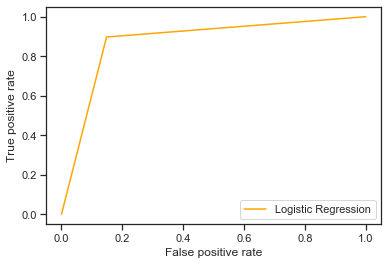

In [26]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_log)
roc_auc = accuracy_score(y_test,y_pred_log)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

In [21]:
# plot_roc_curve(y_pred_log, X_test, y_test)

In [22]:
# from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     10092
           1       0.89      0.90      0.90     13886

    accuracy                           0.88     23978
   macro avg       0.88      0.87      0.87     23978
weighted avg       0.88      0.88      0.88     23978



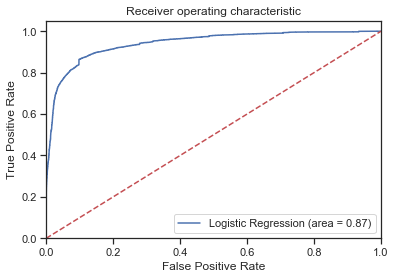

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, grid_clf_acc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, grid_clf_acc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

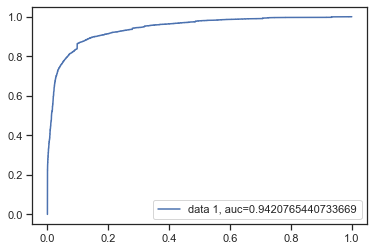

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_proba = grid_clf_acc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

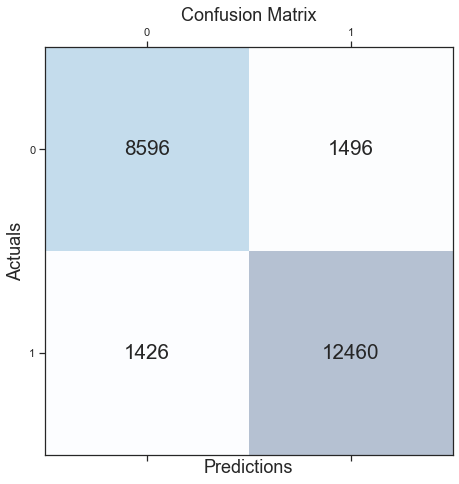

In [31]:
cm=confusion_matrix(y_test,y_pred_log)
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_log)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
#Random Search
logistic = LogisticRegression()

clf = RandomizedSearchCV(logistic, grid_values, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [34]:
best_model = clf.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [35]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 10


In [37]:
y_pred_log = best_model.predict(x_test)


In [38]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_log)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_log)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_log)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_log)))

Accuracy Score : 0.8774293102010176
Precision Score : 0.892449989244999
Recall Score : 0.8963704450525709
F1 Score : 0.8944059210289944
